# Imports

In [4]:
import tensorflow as tf
# import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
print("TensorFlow v" + tf.__version__)
# print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.17.0


In [15]:
from sklearn import preprocessing

# Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset_df = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv") #Training data
test_data = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")   #Testing data
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head()

Full train dataset shape is (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
dataset_df.drop(['Id'], axis=1, inplace=True)
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# House Price Distribution


Now let us take a look at how the house prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-8-dc911a47893e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


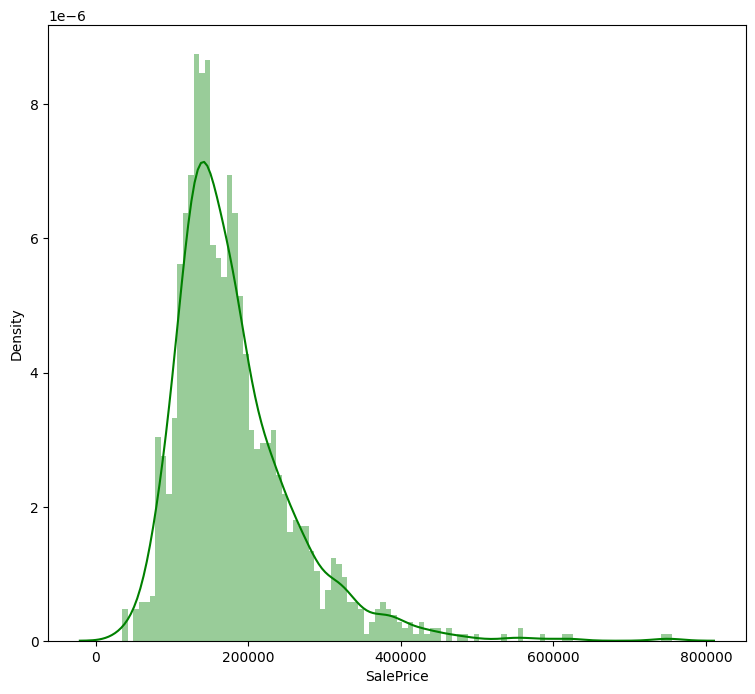

In [8]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# Numerical data distribution


Now we will take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [9]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [10]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


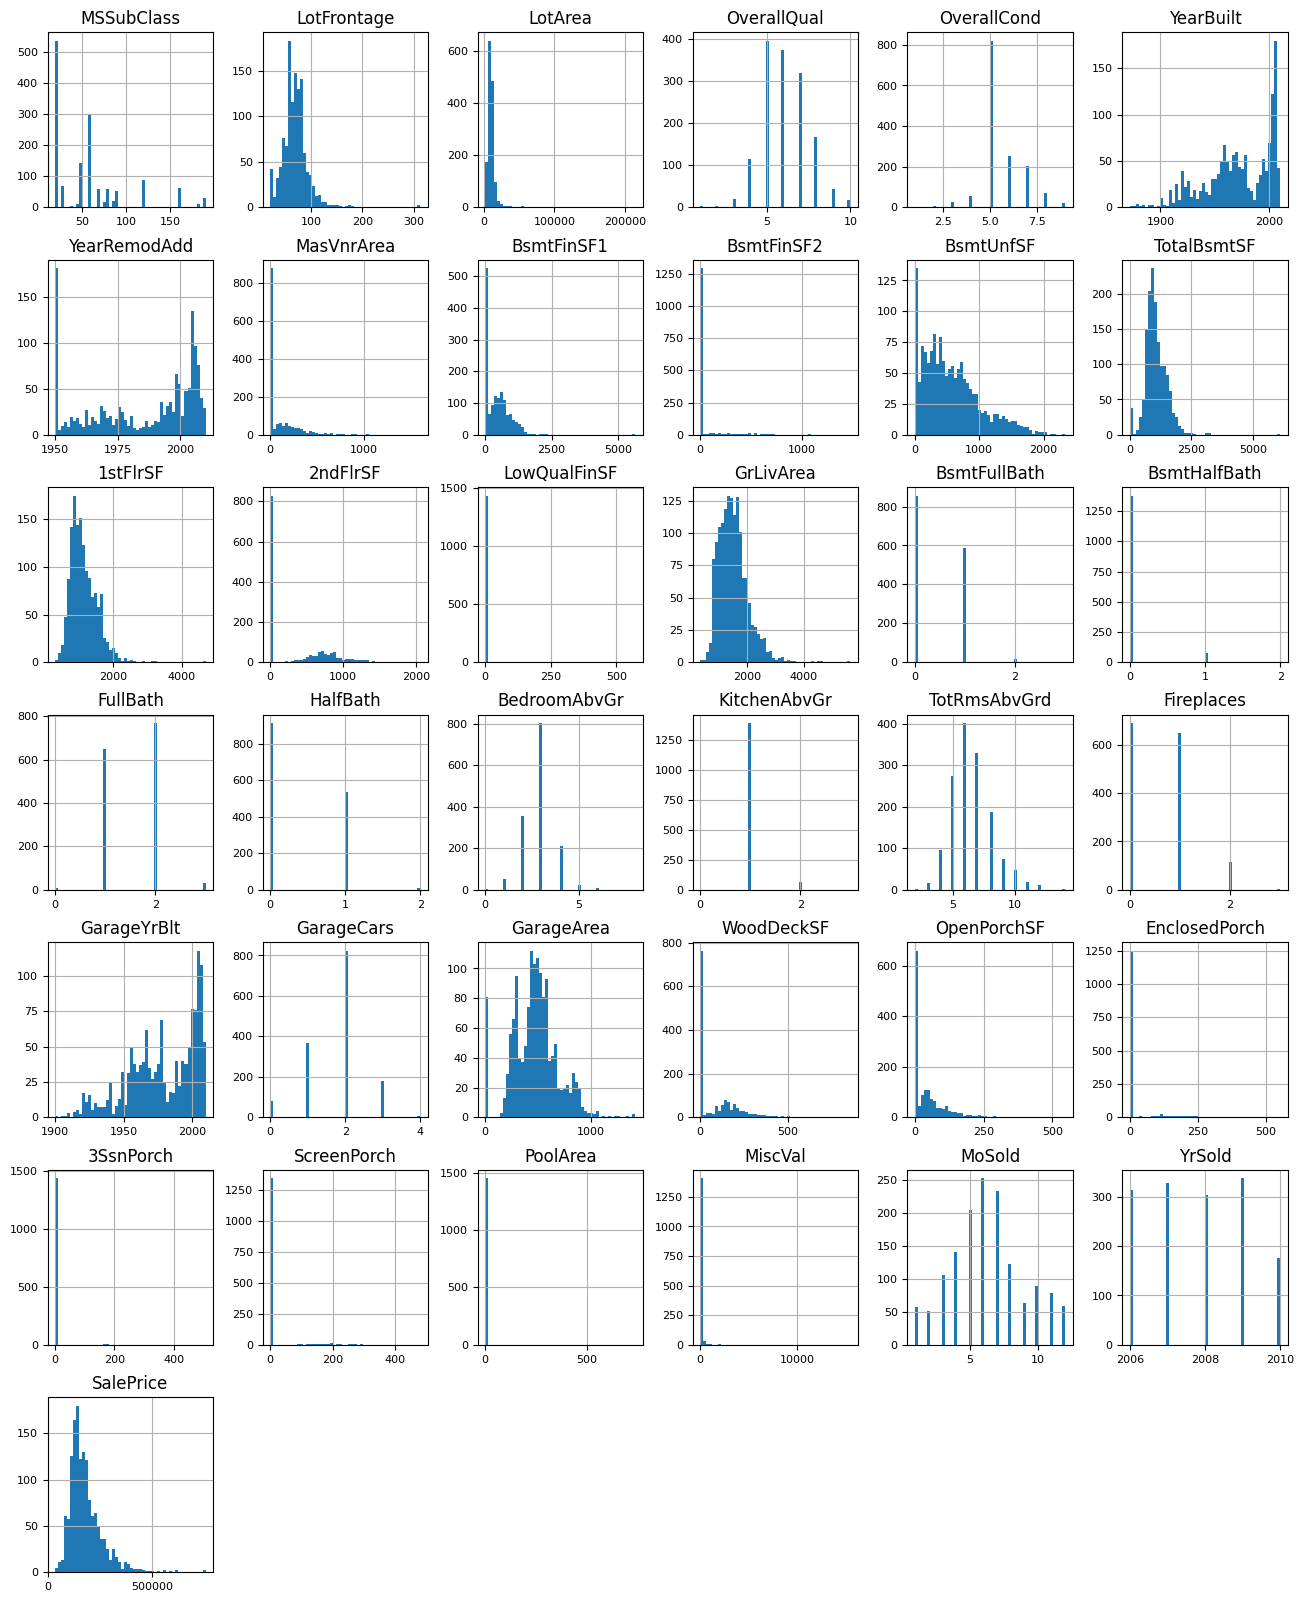

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Data preprocessing


*   Variable Corellation
*   Check NULL Values
*   Check Missing data
*   check outliters (clean/smooth the data)
*   Handle Categorical data (drop/encode)
*   Feature Engineering: Price per square foot = Price / Square Footage
Age of house = Current Year - Year Built
*  Data Scaling  




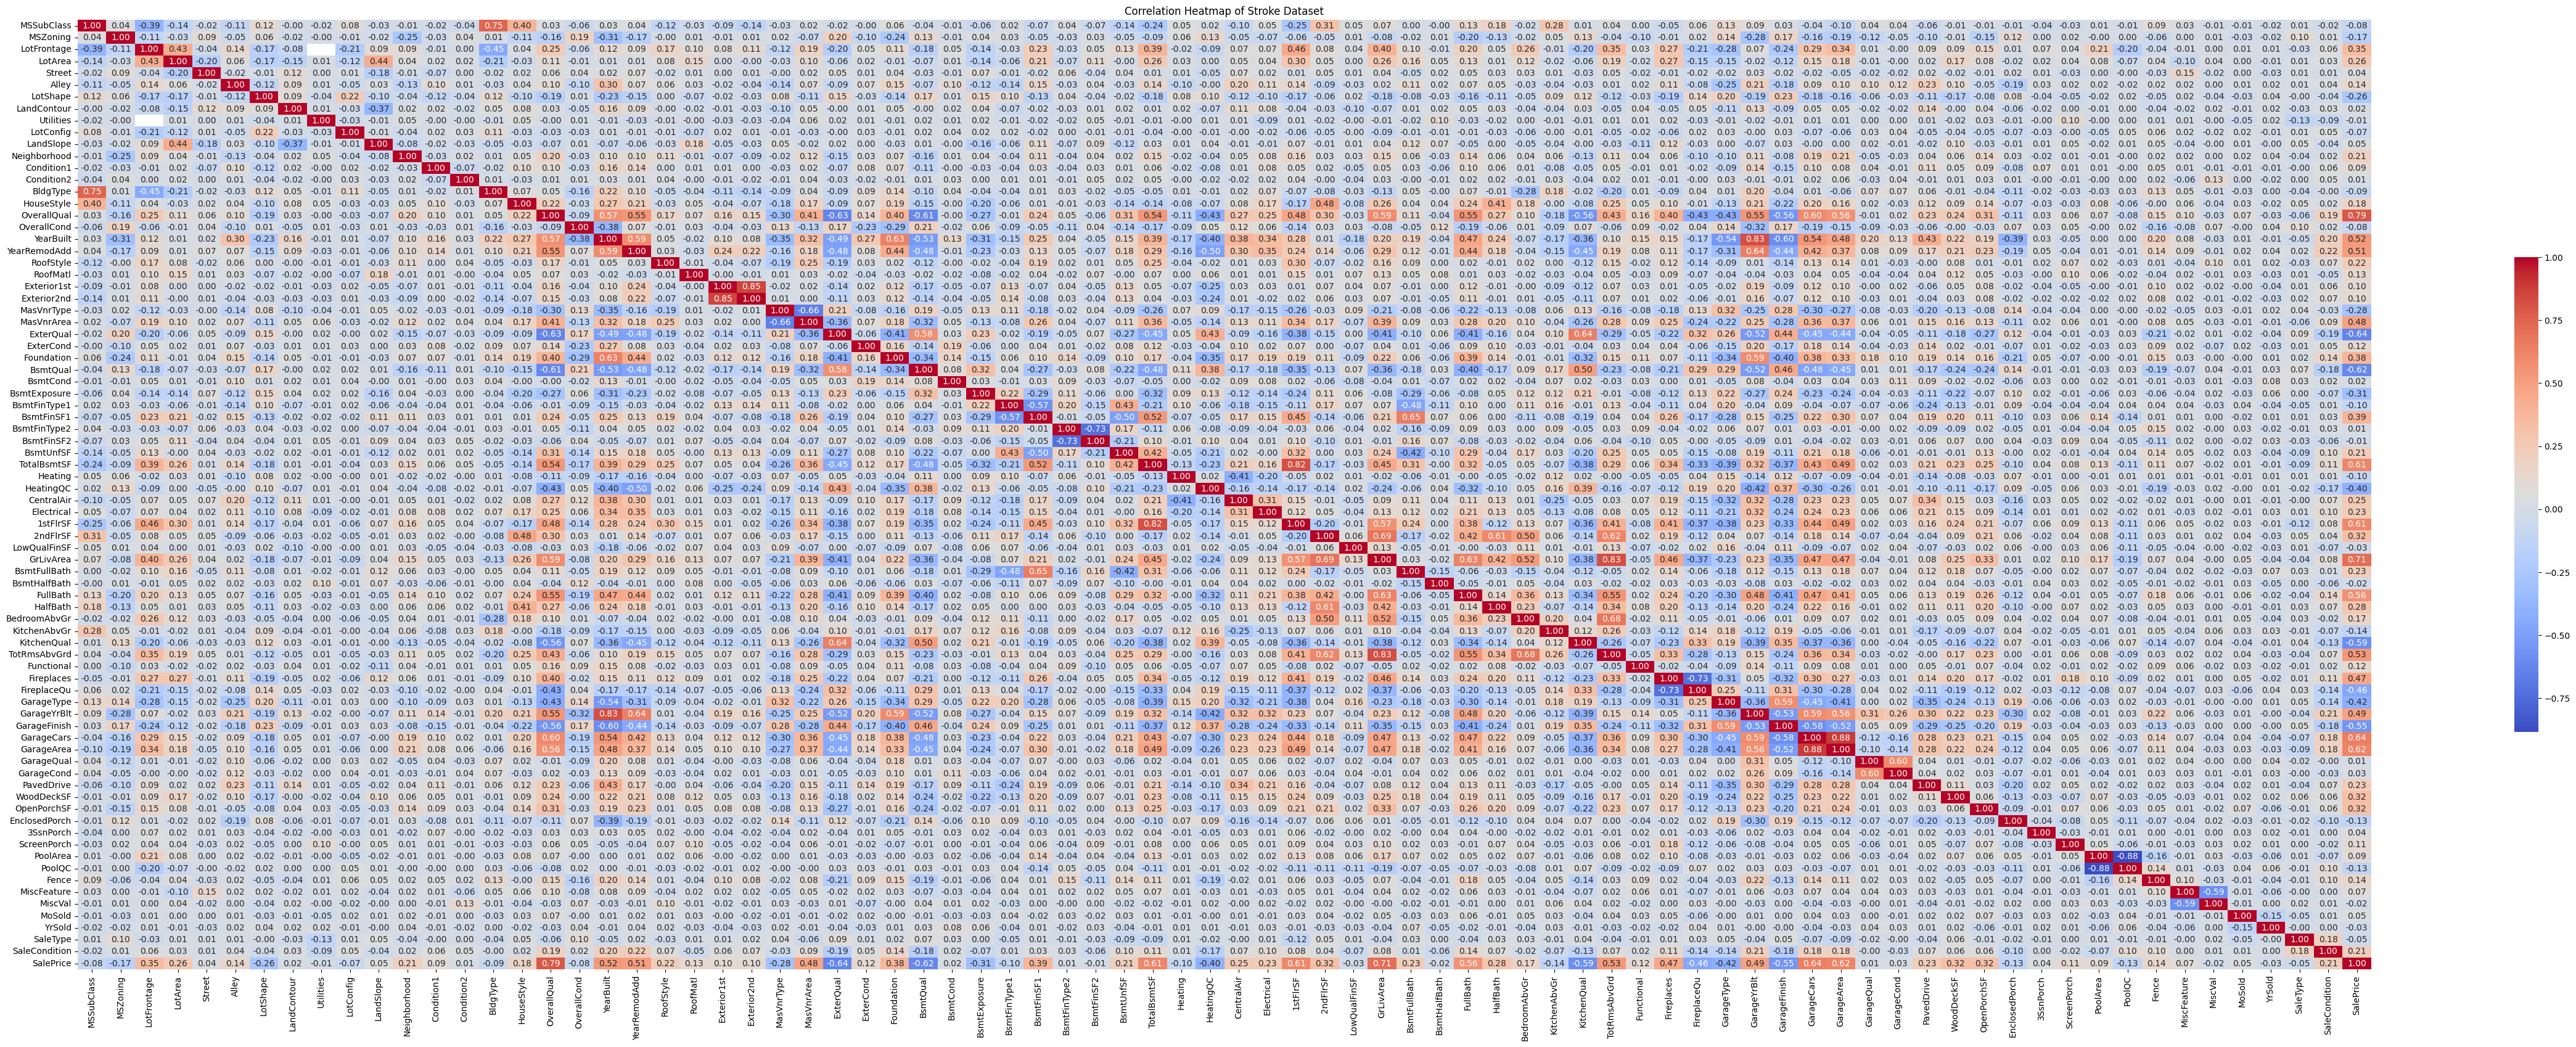

In [18]:
cc = dataset_df.copy(deep=True)

# Initialize the label encoder
ss = preprocessing.LabelEncoder()

# Automatically detect categorical columns
categorical_columns = cc.select_dtypes(include=['object']).columns

# Encode all categorical columns
for col in categorical_columns:
    cc[col] = ss.fit_transform(cc[col])

# Compute the correlation matrix
corr_matrix = cc.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(60, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap of Stroke Dataset')
plt.show()

In [28]:
display(corr_matrix)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.386347,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-0.022844,0.075910,...,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-0.001192,-0.009895,...,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.386347,-0.111690,1.000000,0.426095,-0.040886,0.138101,-0.169641,-0.080757,NaN,-0.208276,...,0.206167,-0.195051,-0.040862,-0.006629,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.139781,-0.034452,0.426095,1.000000,-0.197131,0.060105,-0.165315,-0.149083,0.010123,-0.121161,...,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.040886,-0.197131,1.000000,-0.015720,-0.010224,0.115995,0.001682,0.013960,...,0.004413,-0.004067,-0.029386,0.146712,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.011200,0.001205,0.003690,0.013094,-0.033455,-0.011599,-0.051552,0.018902,...,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.020944,0.036449,0.020507,0.023353,-0.005992,...,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.034559,0.012292,0.014339,0.008205,-0.000911,-0.025754,-0.126770,0.014325,...,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.063372,0.034169,0.006064,0.035717,-0.038118,0.033809,-0.089701,0.051579,...,-0.067251,0.097425,0.100675,0.003192,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


**Check Missing Data**

In [54]:
# Calculate missing values and percentage
missing_data = dataset_df.isnull().sum()
missing_percentage = (missing_data / len(dataset_df)) * 100

# Create a DataFrame for missing data
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': missing_percentage.values
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display in chunks of 20 rows
for i in range(0, len(missing_summary), 20):
    print(missing_summary.iloc[i:i+20])
    print("\n")


          Column  Missing Values  Percentage
2    LotFrontage             259   17.739726
5          Alley            1369   93.767123
24    MasVnrType             872   59.726027
25    MasVnrArea               8    0.547945
29      BsmtQual              37    2.534247
30      BsmtCond              37    2.534247
31  BsmtExposure              38    2.602740
32  BsmtFinType1              37    2.534247
34  BsmtFinType2              38    2.602740
41    Electrical               1    0.068493
56   FireplaceQu             690   47.260274
57    GarageType              81    5.547945
58   GarageYrBlt              81    5.547945
59  GarageFinish              81    5.547945
62    GarageQual              81    5.547945
63    GarageCond              81    5.547945
71        PoolQC            1453   99.520548
72         Fence            1179   80.753425
73   MiscFeature            1406   96.301370




In [55]:
# Calculate missing values and percentage
missing_data = df_num.isnull().sum()
missing_percentage = (missing_data / len(df_num)) * 100

# Create a DataFrame for missing data
missing_summary1 = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': missing_percentage.values
})

# Filter only columns with missing values
missing_summary1 = missing_summary1[missing_summary1['Missing Values'] > 0]

# Display in chunks of 20 rows
for i in range(0, len(missing_summary1), 20):
    print(missing_summary1.iloc[i:i+20])
    print("\n")


         Column  Missing Values  Percentage
1   LotFrontage             259   17.739726
7    MasVnrArea               8    0.547945
24  GarageYrBlt              81    5.547945




In [47]:
num_cols_all = dataset_df.shape[1]
print(f'The dataset has {num_cols_all} columns.')

The dataset has 80 columns.


In [48]:
num_cols_num = df_num.shape[1]
print(f'The dataset has {num_cols_num} columns.')

The dataset has 37 columns.


In [52]:
print(dataset_df.isnull().sum().sum())



7829


In [56]:
missing_summary['Missing Values'].sum()

7829

# ML Models

# Deep learning models

# Extra